# TITLE: **Food Delivery Time Prediction and Analysis**

In [1]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

### Data Acquisition


---

In [2]:
# Importing Dataset

master_df = pd.read_csv('finalTrain.csv')
master_df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             80.372929                   26.593504   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    78.116106  12-02-2022       21:55             22:10   
1                    76.347589  13-02-2022       14:55             15:05   
2                    74.006619  04-03-2022       17:30             17:40   
3                    75.829346  13-02-2022       09:20             09:30   
4                    80.502929  14-02-2022       19:50             20:05   

  Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
0                Fog                  Jam                  2         Snack   
1             Stormy                 High                  1          Meal   
2         Sandstorms               Medium                  1        Drinks   
3         Sandstorms                  Low                  0        Buffet   
4                Fog                  Jam                  1         Snack   

  Type_of_vehicle  multiple_deliveries Festival           City  \
0      motorcycle                  3.0       No  Metropolitian   
1      motorcycle                  1.0       No  Metropolitian   
2         scooter                  1.0       No  Metropolitian   
3      motorcycle                  0.0       No  Metropolitian   
4         scooter                  1.0       No  Metropolitian   

   Time_taken (min)  
0                46  
1                23  
2                21  
3                20  
4                41

#### **Understanding and describing the data**
---

In [3]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

---
##### We have **19 columns** and **45,593 rows** in the original dataset.

##### Describing columns that are not obviously named:


> **ID:** Order ID.


> **Vehicle_condition:** 0 means very good, 3 means very bad.


> **Type_of_order:** Snack, Drinks, Buffet or Meal.

> **multiple_deliveries:** How many deliveries have to be made in one trip.
---










In [4]:
# Checking for null values in the unmodified dataset

master_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

---
##### We see that all rows and columns are filled in the unmodified dataset.
##### But there might still exist null values in wrong formats.
---

## Data Pre-Processing
---
### Data Cleaning

In [5]:
# Finding all types of null values, storing in set null_types

master_df = master_df.astype(str) # converting dataframe to string

null_types = set()

for column in master_df.columns:
  unique_vals = master_df[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'nan'}


In [6]:
# Correcting null values to np.nan

for na_value in null_types:
  master_df.replace(na_value, np.nan, inplace = True)

In [7]:
# Counting null values again

master_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
# removing whitespaces from either sides

master_df = master_df.apply(lambda x: x.str.strip())
master_df.drop(columns= master_df.columns[0], inplace = True)

In [9]:
# Data imputation using KNN-Imputer
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer()
master_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]
master_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"""

"\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer()\nmaster_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]\nmaster_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"

In [10]:
# Dropping rows containing null values

master_df.dropna(inplace = True)

### Data Wrangling
---

In [11]:
# Converting columns to correct data-type

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken (min)']

## Converting numerical columns to float
for col in num_cols:
    master_df[col] = master_df[col].astype('float64')
    
## Converting Order_Date column to datetime date format
master_df['Order_Date'] = pd.to_datetime(master_df['Order_Date'], format = "%d-%m-%Y")

In [12]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lab = le.fit_transform(master_df['Delivery_person_ID'])

In [13]:
# one hot encoding
encoded_df = master_df.copy()

encoded_df = pd.get_dummies(encoded_df ,columns = ['Weather_conditions','Road_traffic_density','Type_of_order',
                                                  'Type_of_vehicle', 'City'])
encoded_df = pd.get_dummies(encoded_df ,columns = ['Festival'], drop_first=True)

### Adding useful features
---

In [14]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

# creating new column filled with zeroes
master_df['distance_km'] = np.zeros(master_df.shape[0])

restaurant_cordinates = master_df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = master_df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# calculating and filling in distance
for i in range(master_df.shape[0]):
    master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km

# Dropping lat long columns
master_df = master_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] )

In [15]:
# Cleaning column 'distance_km'

# Converting to string to remove ' km'
master_df['distance_km'] = master_df['distance_km'].astype(str).str[:-3].replace('',0)

# Converting to float and rounding off
master_df['distance_km'] = master_df['distance_km'].astype(float).round(2)

In [16]:
# We check for anomalous distance values

threshold_dist = 25
print(f"Number of deliveries with distance more than {threshold_dist} km =",
      master_df[master_df['distance_km'] > 25]['distance_km'].count())

print(f"Number of deliveries with distance 0 =",
      master_df[master_df['distance_km'] == 0]['distance_km'].count())

Number of deliveries with distance more than 25 km = 131
Number of deliveries with distance 0 = 3835


In [17]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = master_df[(master_df['distance_km'] == 0) | (master_df['distance_km'] > 25)].index

master_df.drop(index_to_drop, inplace = True)

In [18]:
# Adding column for avg_speed

master_df['avg_speed_kmph'] = round(master_df['distance_km']*60 / master_df['Time_taken (min)'])

# Exploratory Data Analysis
---

In [19]:
# Doing EDA on a copy of the master dataframe

edal_df = master_df.copy()

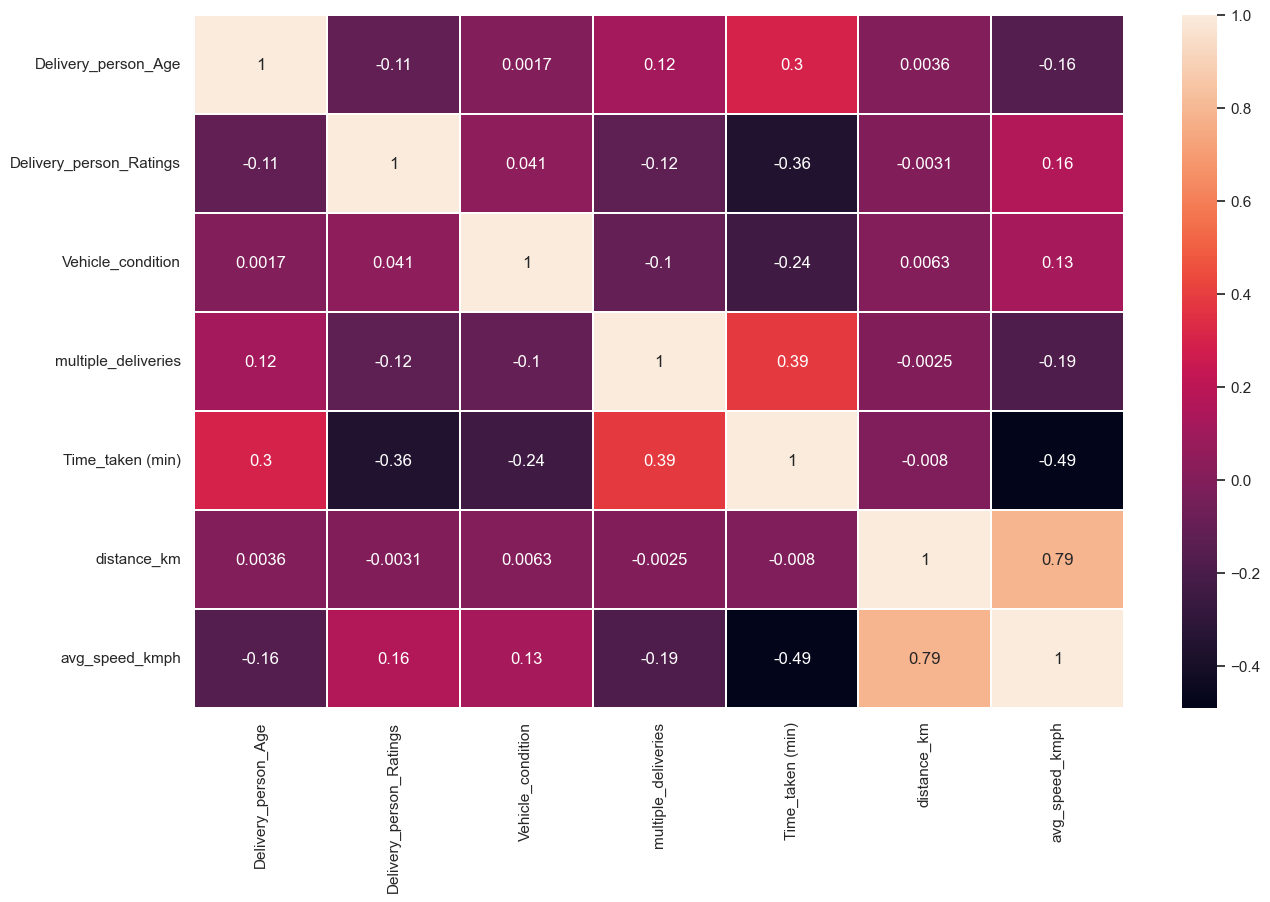

In [20]:
# Correlation HeatMap

plt.figure(figsize=(15,9))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

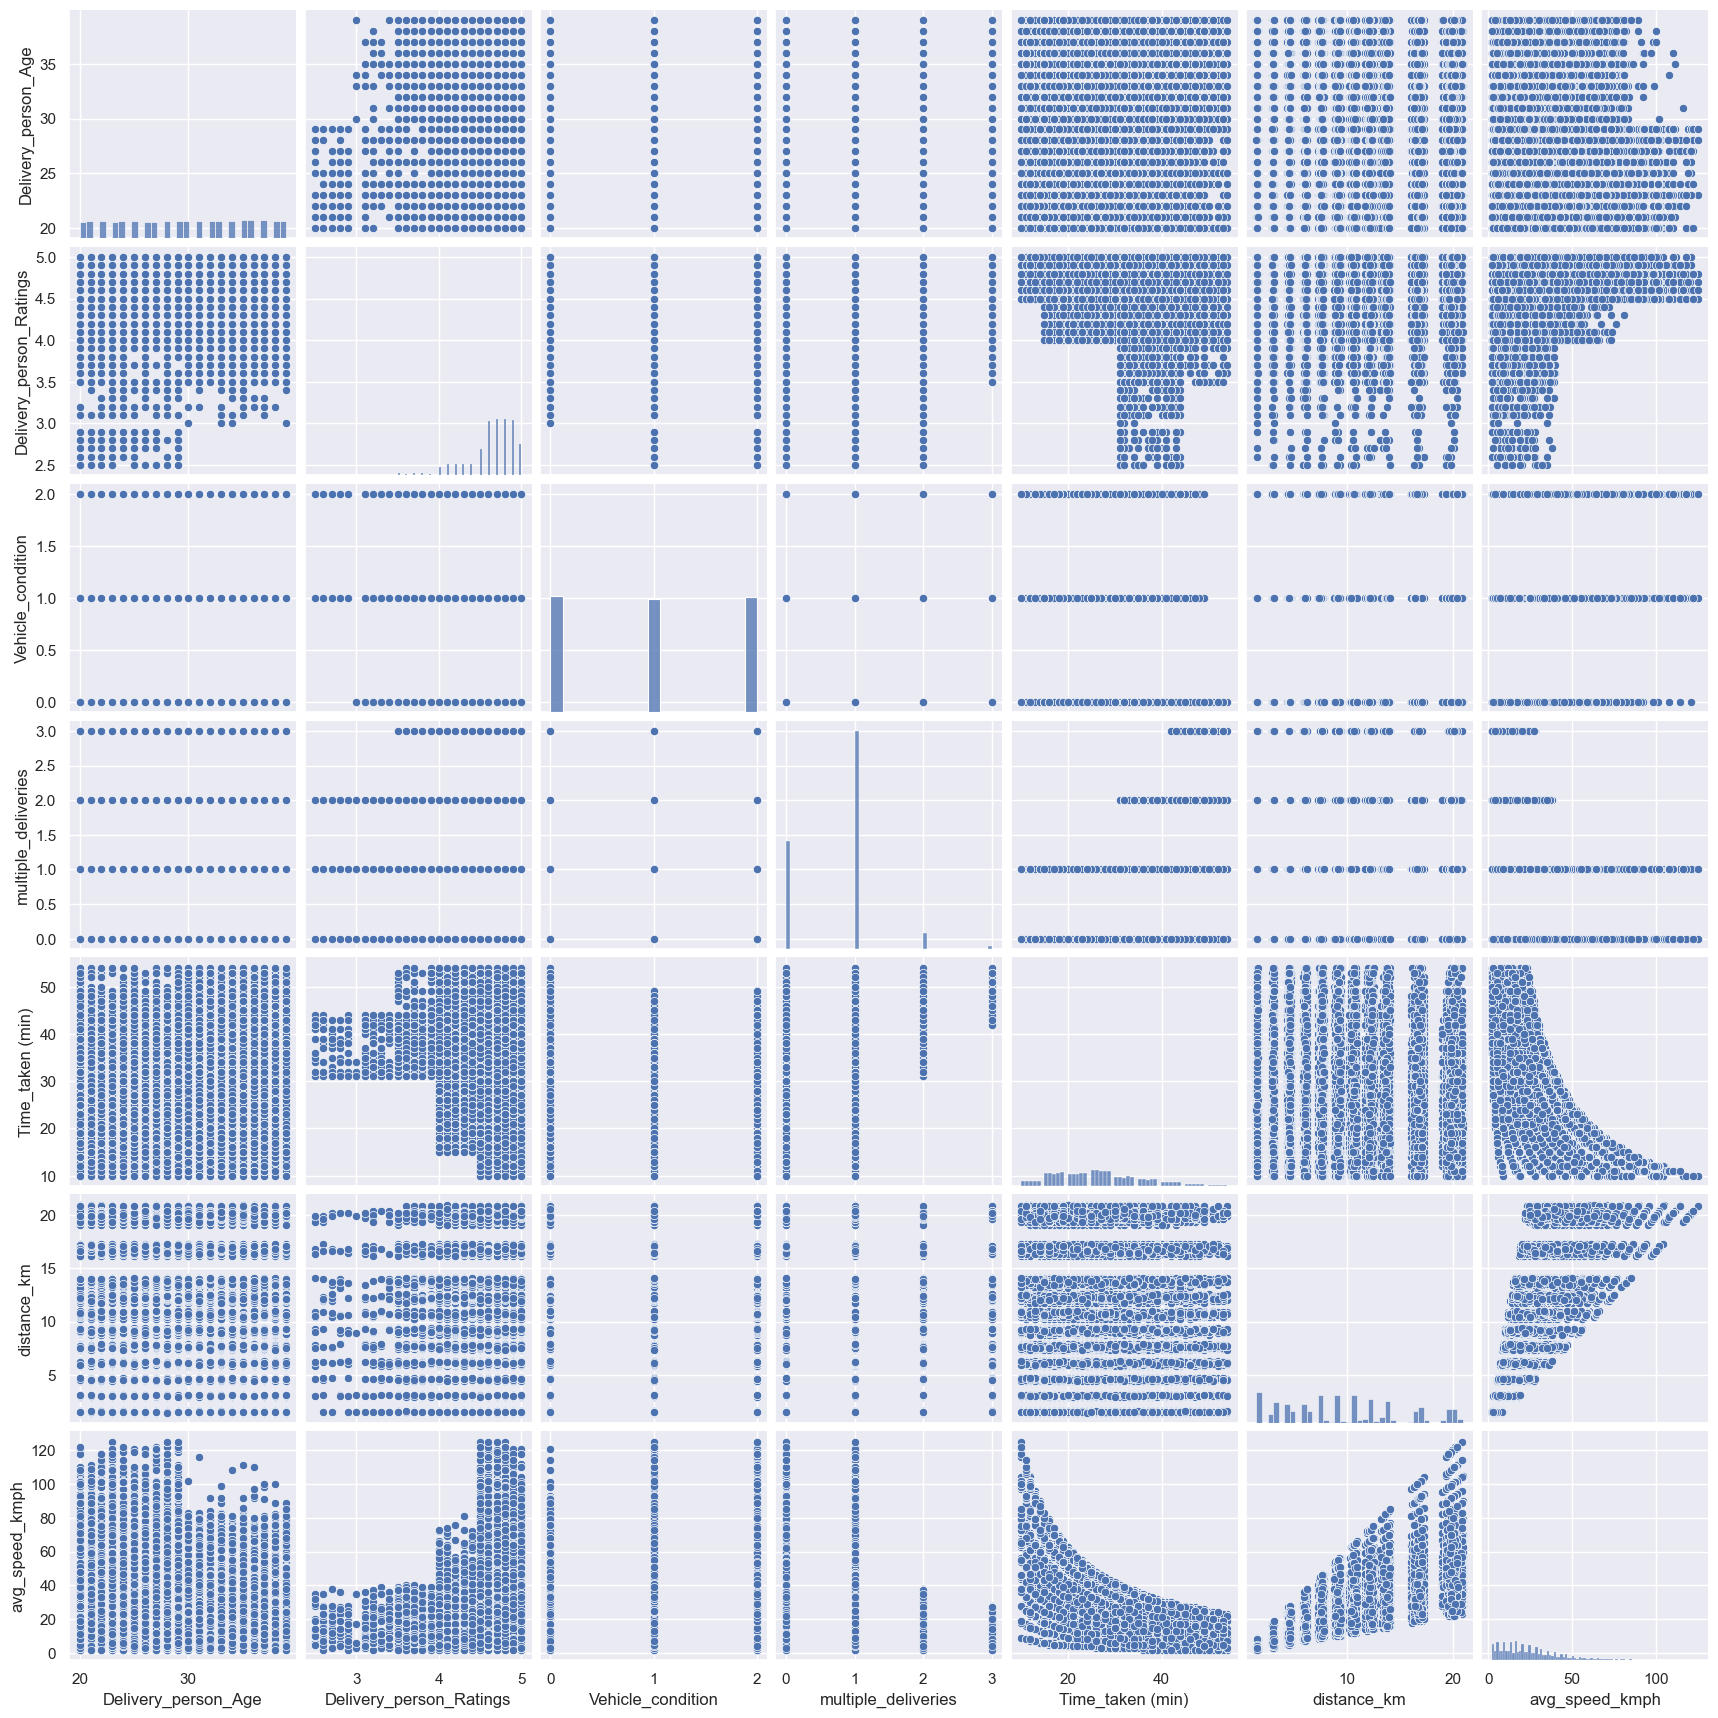

In [21]:
# Pair Plots

sns.pairplot(edal_df)

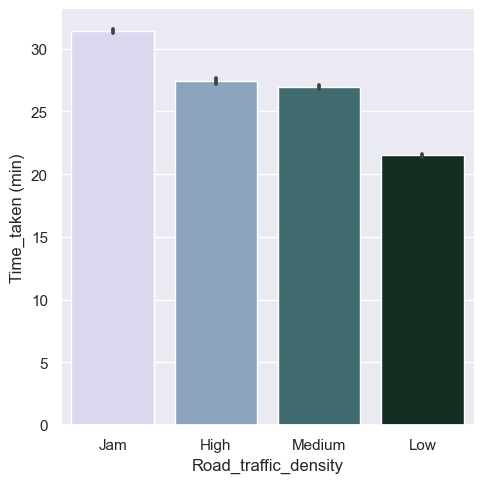

In [22]:
sns.catplot(x="Road_traffic_density", 
            y="Time_taken (min)",
            kind="bar",
            palette="ch:5", 
            data=edal_df)

In [23]:
# Age v/s Delivery Time (Weatherwise)

fig=px.line(edal_df.sort_values(by='Delivery_person_Age'),
            x='Delivery_person_Age',
            y='Time_taken (min)',
            animation_frame='Weather_conditions',
            animation_group='Delivery_person_Age',
            color='Weather_conditions',
            markers=True,
            template='plotly_dark',
            title='<b>Driver Age vs Delivery Time (Weatherwise)')

fig.update_traces(showlegend=False)

In [24]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 28.79 kmph
Average speed of persons above 30: 21.7 kmph


##  The average delivery speed of delivery persons under the age of 30 is about 30% more than of those above the age of 30

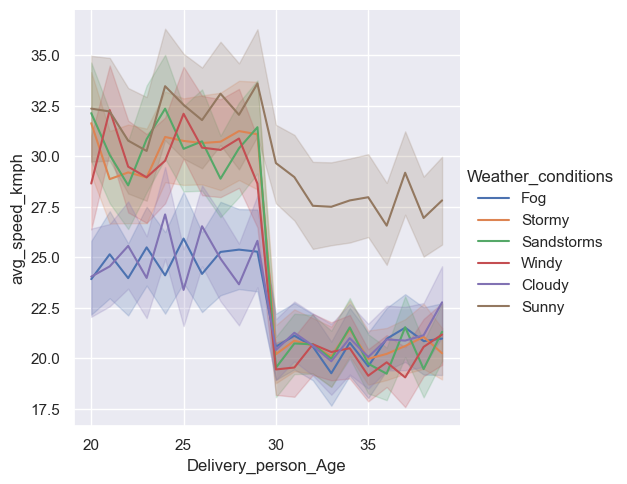

In [25]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weather_conditions',kind = 'line')

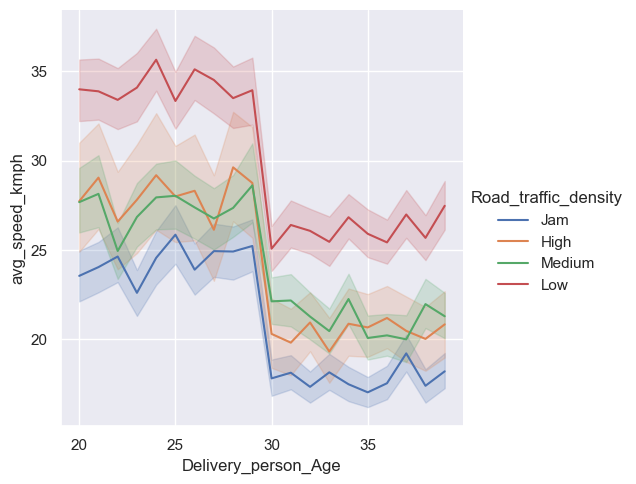

In [26]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

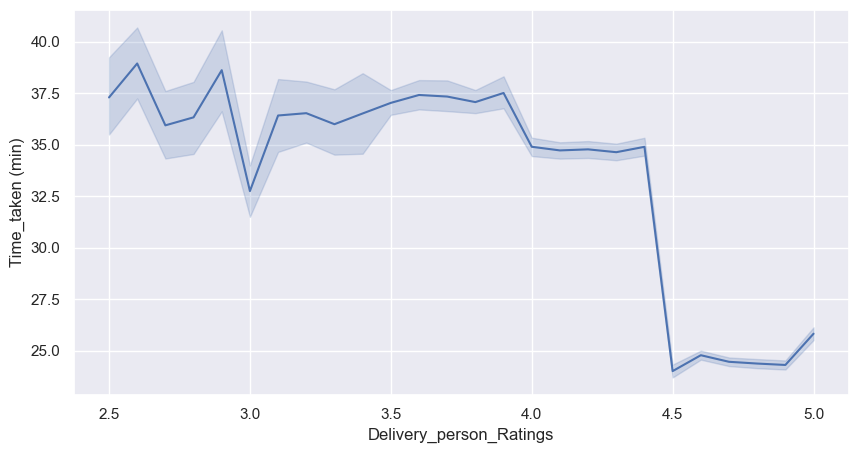

In [27]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken (min)", data=edal_df)
plt.show()

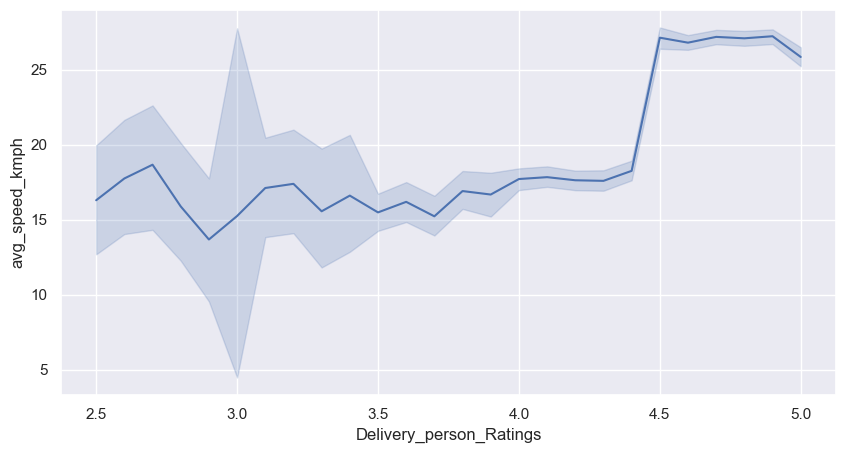

In [28]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="avg_speed_kmph", data=edal_df)
plt.show()

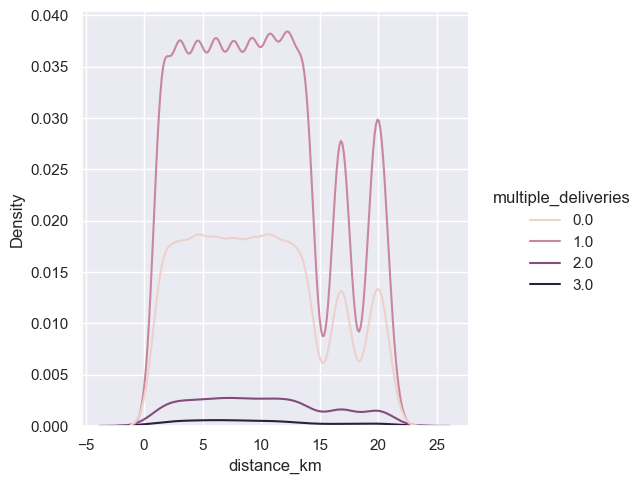

In [29]:
sns.displot(hue='multiple_deliveries',data=edal_df,kind='kde', x = 'distance_km')

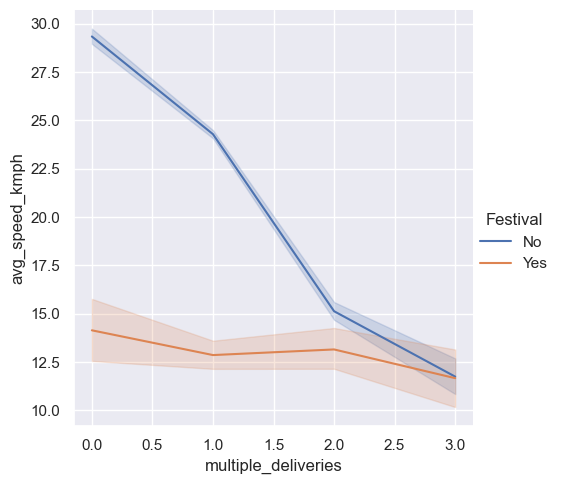

In [30]:
sns.relplot(data = edal_df, x = 'multiple_deliveries', y = 'avg_speed_kmph',hue='Festival',kind = 'line')

In [31]:
#  Sunny vs Storms vs Winds/Fog

edal_df[edal_df['Weather_conditions'] == 'Sunny']['avg_speed_kmph'].mean()

30.079159663865546

In [32]:
edal_storms = edal_df.loc[(edal_df['Weather_conditions'] == 'Stormy') | (edal_df['Weather_conditions'] == 'Sandstorms')]
print(edal_storms['Weather_conditions'].unique())
edal_storms['avg_speed_kmph'].mean()

['Stormy' 'Sandstorms']


25.351493848857643

In [33]:
edal_not_storms = edal_df.loc[(edal_df['Weather_conditions'] != 'Stormy') & (edal_df['Weather_conditions'] != 'Sandstorms')
                                 & (edal_df['Weather_conditions'] != 'Sunny')]
print(edal_not_storms['Weather_conditions'].unique())
edal_not_storms['avg_speed_kmph'].mean() 

['Fog' 'Windy' 'Cloudy']


23.512443857331572

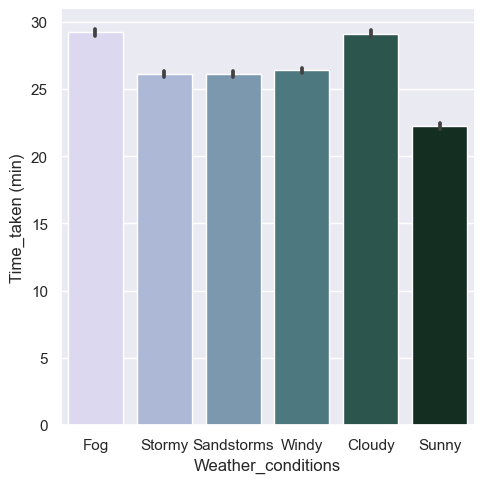

In [34]:
# Catplot: Delivery Time v/s Weather Conditions

sns.catplot(data=edal_df, x="Weather_conditions", y="Time_taken (min)", kind="bar", palette="ch: 5",)

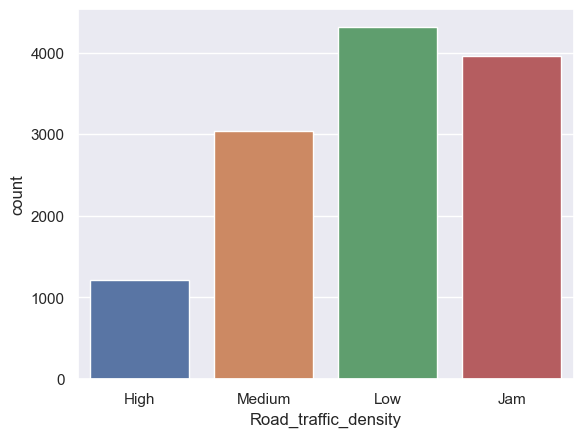

In [35]:
sns.countplot(x='Road_traffic_density',data=edal_storms)
plt.show()

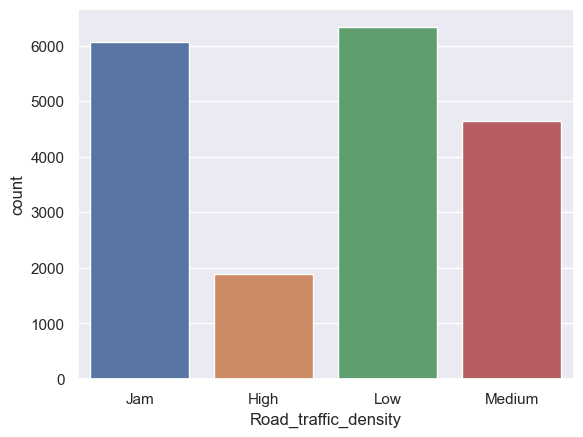

In [36]:
sns.countplot(x= 'Road_traffic_density',data=edal_not_storms)
plt.show()

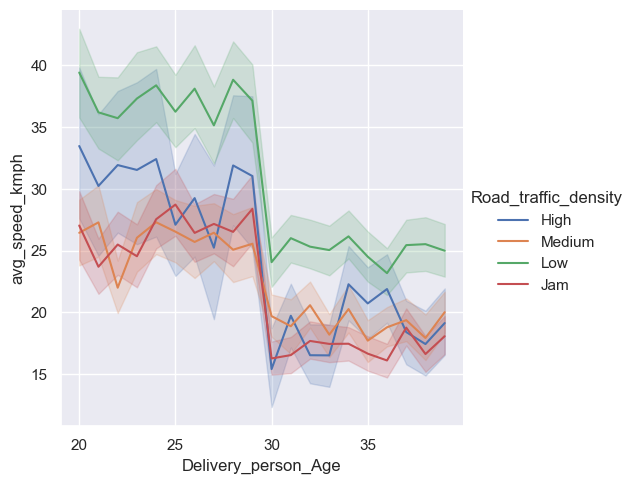

In [37]:
sns.relplot(data = edal_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

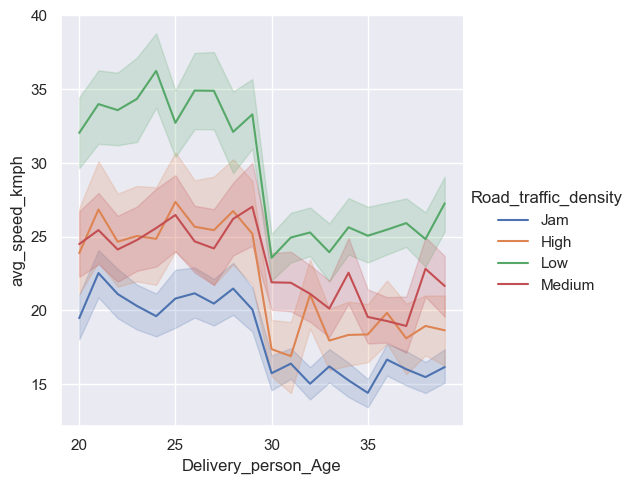

In [38]:
sns.relplot(data = edal_not_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

# PDSL
---

In [39]:
pdsl_df = master_df.copy()
pdsl_df = pdsl_df.drop(columns = ['Time_Orderd','Time_Order_picked', 'Delivery_person_ID','Order_Date'] )
pdsl_df.head()

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
0                 36.0                      4.2                Fog   
1                 21.0                      4.7             Stormy   
2                 23.0                      4.7         Sandstorms   
3                 34.0                      4.3         Sandstorms   
4                 24.0                      4.7                Fog   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
0                  Jam                2.0         Snack      motorcycle   
1                 High                1.0          Meal      motorcycle   
2               Medium                1.0        Drinks         scooter   
3                  Low                0.0        Buffet      motorcycle   
4                  Jam                1.0         Snack         scooter   

   multiple_deliveries Festival           City  Time_taken (min)  distance_km  \
0                  3.0       No  Metropolitian              46.0        10.27   
1                  1.0       No  Metropolitian              23.0         6.23   
2                  1.0       No  Metropolitian              21.0        13.76   
3                  0.0       No  Metropolitian              20.0         2.93   
4                  1.0       No  Metropolitian              41.0        19.37   

   avg_speed_kmph  
0            13.0  
1            16.0  
2            39.0  
3             9.0  
4            28.0

In [40]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken (min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')

In [41]:
# 0 -- bad, 1 - good, 2-better, 3-best -- vehicle condition

In [42]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weather_conditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)

In [43]:
features = pdsl_df.drop('Time_taken (min)', axis =1)
label = pdsl_df['Time_taken (min)'].copy()

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26175, 27) (11218, 27) (26175,) (11218,)


# Model

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt



model_lr = LinearRegression()
model_la = Lasso()
model_lri = Ridge()
model_le = ElasticNet()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr,'Lasso':model_la,'Ridge':model_lri,'Elastic Net':model_le,'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr, 
          'Decision Tree Regressor': model_dtr}

for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  75.9045728710504
Accuracy in testing dataset:  75.2994854859153
RMSE value:  4.660403022897845
--------------------------------------
Lasso
Accuracy in training dataset:  62.53681528057058
Accuracy in testing dataset:  62.04696769989927
RMSE value:  5.776884910617656
--------------------------------------
Ridge
Accuracy in training dataset:  75.90454582498951
Accuracy in testing dataset:  75.30036208332173
RMSE value:  4.660320325562798
--------------------------------------
Elastic Net
Accuracy in training dataset:  64.49508756745826
Accuracy in testing dataset:  64.01623257176328
RMSE value:  5.625016374021011
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.64179329772215
Accuracy in testing dataset:  97.46427309590999
RMSE value:  1.4932128363846942
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  93.63802898755546
Accuracy in testing da

The best model in Random Forest

In [47]:
print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Accuracy in training dataset:  99.64179329772215
Accuracy in testing dataset:  97.46427309590999
RMSE value:  2.039981891767116


Delivery_person_Ratings  actual  predicted
4590                       4.8    29.0      30.07
33756                      4.9    18.0      18.52
11923                      4.5    16.0      16.00
369                        4.9    10.0      10.61
15222                      4.6    23.0      23.09
9107                       4.1    39.0      38.84
40047                      4.7    44.0      36.09
12153                      4.6    29.0      28.70
26521                      4.5    28.0      28.76
3178                       4.0    39.0      39.67

## abc
---

<Axes: xlabel='Festival', ylabel='Time_taken (min)'>

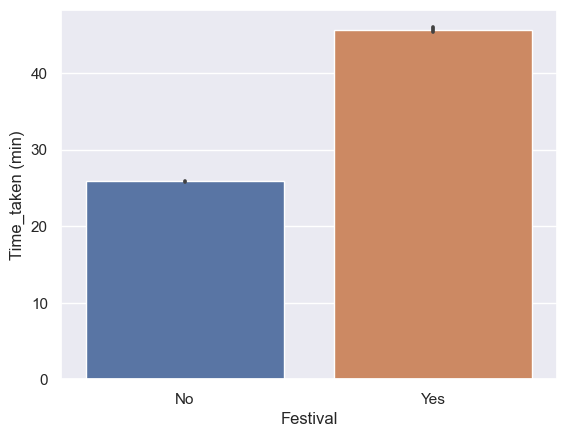

In [48]:
rating_4_plus = master_df[master_df['Delivery_person_Ratings'] >= 4]

sns.barplot(x = 'Festival', y = 'Time_taken (min)', data = rating_4_plus)

In [49]:
rating_4_plus[ rating_4_plus['Festival'] == 'Yes']['Time_taken (min)'].mean()

45.69565217391305

In [50]:
rating_4_plus[ rating_4_plus['Festival'] == 'No']['Time_taken (min)'].mean()

25.849890245961614